# Regression
---
목표: BMI 지수를 예측한다.


- Multiple Linear Regression

  target : BMI

### Read CSV File

In [53]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


null 값이 없고, 모든 column이 numerical variable인 768개 dataset이다.

In [55]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Correlation Heatmap

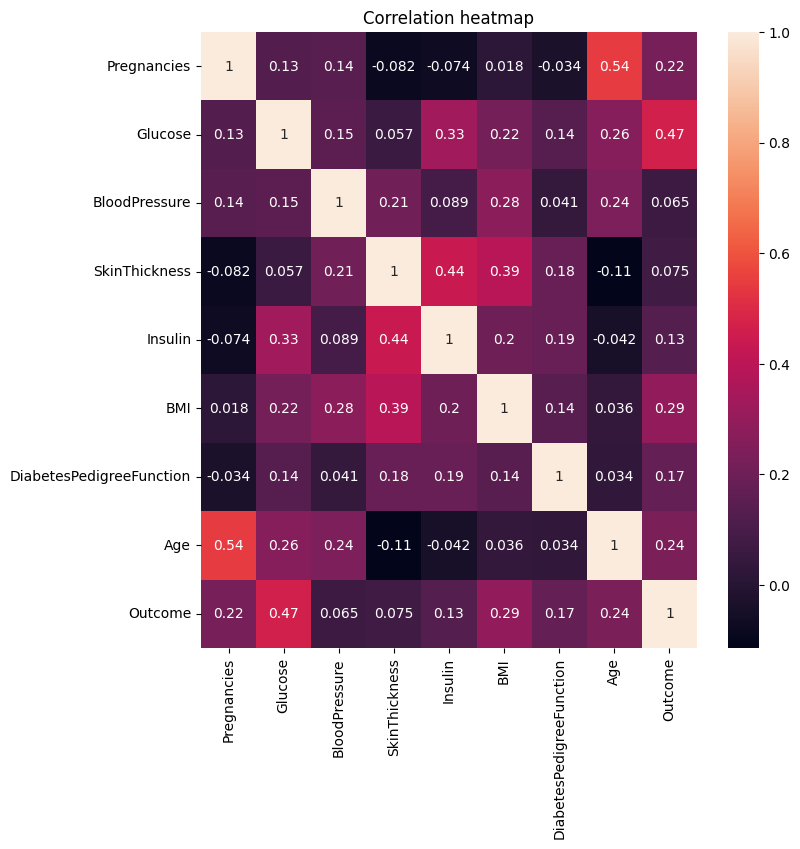

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(df_corr, annot=True)
plt.title('Correlation heatmap')
plt.show()


Target variable인 BMI와 correlation을 분석해봤을 때 모든 feature와 양의 상관관계를 갖는 것을 볼 수 있다.

In [57]:
X = df.drop(['Outcome', 'BMI'], axis=1)
y = df['BMI']

In [58]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [59]:
y.head()

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1


### Train, test split

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 7) (154, 7)
(614,) (154,)


### Scaling

In [61]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_scaled = ss.fit_transform(X_train)
test_scaled = ss.transform(X_test)

## Multiple Linear Regression



In [62]:
from sklearn.linear_model import LinearRegression

#multiple
lr = LinearRegression()
lr.fit(train_scaled, y_train)

y_pred = lr.predict(test_scaled)

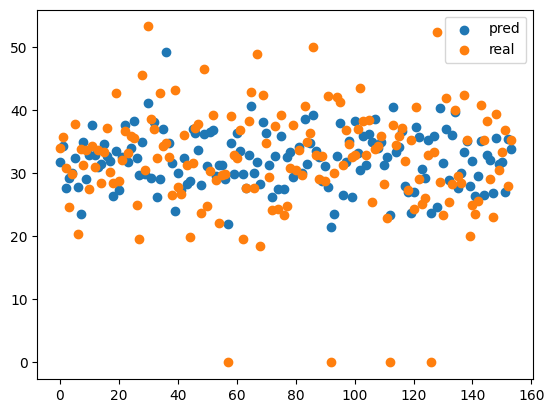

In [63]:
plt.scatter(range(len(y_pred)), y_pred)
plt.scatter(range(len(y_test)), y_test)
plt.legend(['pred', 'real'])
plt.show()

### Evaluate Model

In [64]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.26510155544609015

다른 모델을 사용해봐야 겠다.

## ExtraTreesRegressor

In [65]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(train_scaled, y_train)

y_pred = model.predict(test_scaled)

### Evaluate

In [71]:
r2_score(y_test, y_pred)

-0.20069399958910483

- Feature importance

In [66]:

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances)

Pregnancies                 0.097747
Glucose                     0.132613
BloodPressure               0.164638
SkinThickness               0.308964
Insulin                     0.054589
DiabetesPedigreeFunction    0.106822
Age                         0.134628
dtype: float64


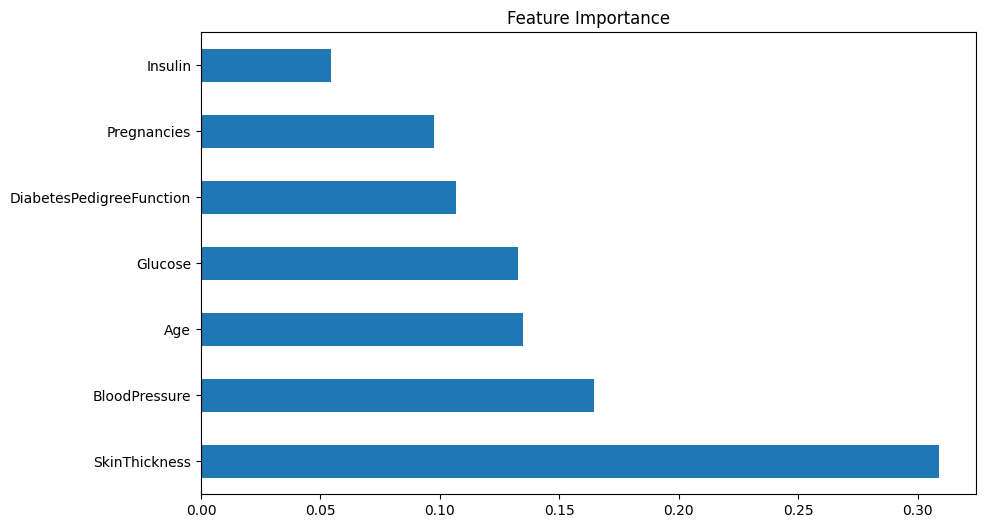

In [67]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
feature_importances.nlargest(7).plot(kind='barh')
plt.show()

### Feature Selection

In [68]:
X_selected = X[['SkinThickness', 'BloodPressure', 'Glucose', 'Age', 'DiabetesPedigreeFunction']]

In [69]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
train_poly = poly.fit_transform(train_scaled)
test_poly = poly.transform(test_scaled)

#poly
lr.fit(train_poly, y_train)
print('poly score')
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

poly score
0.40066057496881247
-0.20069399958910483


In [70]:
from sklearn.metrics import (mean_squared_error, r2_score)

#평가
y_pred = lr.predict(test_poly)
print(f"mse = {mean_squared_error(y_test,y_pred)}")
print(f"r2score = {r2_score(y_test, y_pred)}")

mse = 85.35186708634791
r2score = -0.20069399958910483


과소적합 성능이 너무 안좋다.